In [2]:
pip install mlrose

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=21261794d9bba292dc9e406fa0a18e61b6f53c67c21869bb334439eb9936eef4
  Stored in directory: /Users/jonathanmotyka/Library/Caches/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mlrose
import time
np.random.seed(16516)

ImportError: cannot import name 'six' from 'sklearn.externals' (/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/__init__.py)

# ML Project 2
### Part 1: Discrete Optimization Problems (Fitness Functions)
 - An optimization problem is defined by Russell and Norvig (2010) as a problem in wihch "the aim is to find th ebest state according to an objective function."

 - The five-dimensional One-Max optimization problem involves finding the value of a state vector $x = [x_0,x_1,x_2,x_3,x_4]$ which maximizes $Fitness(x) = x_0+x_1+x_2+x_3+x_4$.  If each of the elements of $x$ is set equal to this optimal value, $Fitness(x) = 5$, the maximum value it can take.

#### OneMax Problem
 - Use bitstrings of lengths:
  - 10
  - 100
  - 1000

In [74]:
def optimization_alg(fitness, name, schedule, alg, queens=False):
  fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))
  fig.tight_layout(pad=3.0)
  bf, size, times = [], [], []
  for ind, i in enumerate([10, 100, 1000]):
    start = time.time()
    problem = mlrose.DiscreteOpt(length=i, fitness_fn=fitness, maximize=True, 
                                max_val=10)
    if not queens:
      init_state = np.random.choice([0,1], size=i, replace=True)
    else:
      init_state = np.random.choice(np.arange(i-1), size=i, replace=True)

    if alg == 'Randomized Hill Climb':
      best_state, best_fitness, curve = mlrose.random_hill_climb(problem, max_attempts=10, max_iters=1000, restarts=10,
                                                              init_state=init_state, curve=True, random_state=0)
    elif alg == 'Simulated Annealing':
      best_state, best_fitness, curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=10,
                                                                init_state=init_state, curve=True, random_state=0)
    elif alg == 'Genetic Algorithm':
      best_state, best_fitness, curve = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=10, max_iters=1000,
                                                                curve=True, random_state=0)
    elif alg == 'MIMIC':
      best_state, best_fitness, curve = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=1000,
                                                                curve=True, random_state=0)

    bf.append(best_fitness)
    size.append(i)
    times.append(time.time()-start)
    axes[ind].plot(np.arange(len(curve)), curve, label=f'problem size={i}')
    axes[ind].set_title(f'Problem Size = {i}')
    axes[ind].set_xlabel('Iteration')
    axes[ind].set_ylabel('Fitness State')
  axes[3].plot(size, bf)
  axes[3].set_title('Best State per Problem Size')
  axes[3].set_xlabel('Problem Size')
  axes[3].set_ylabel('Best Fitness State')

  axes[4].plot(size, bf)
  axes[4].set_title('Algorithm Time per Problem Size')
  axes[4].set_xlabel('Problem Size')
  axes[4].set_ylabel('Time (seconds)')
  fig.suptitle(f'{name} {alg} (10 Restarts)', fontsize=16, y=1.0)
  plt.show()


def optimize(fitness, name, queens=False):
  schedule = mlrose.ExpDecay()  # Define Decay Schedule
  for alg in ['Randomized Hill Climb', 'Simulated Annealing', 'Genetic Algorithm', 'MIMIC']:
    optimization_alg(fitness=fitness, name=name, schedule=schedule, alg=alg, queens=queens)

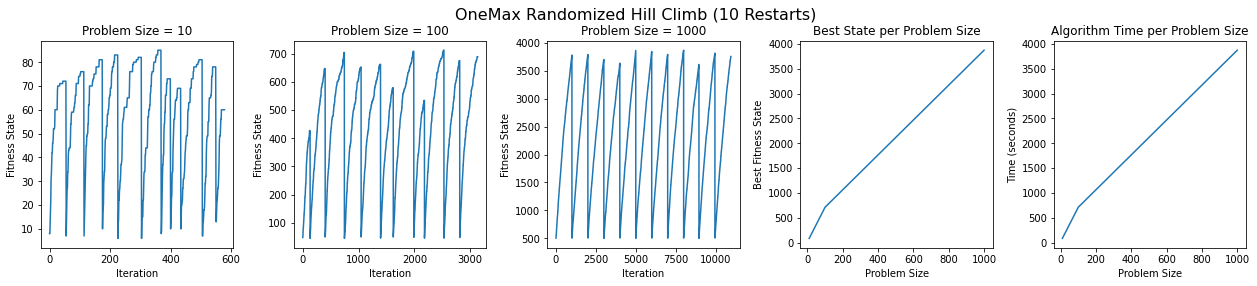

/usr/local/lib/python3.6/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


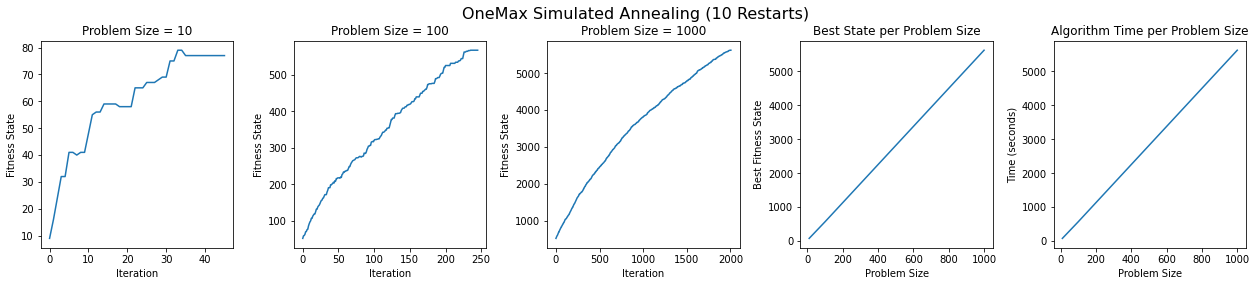

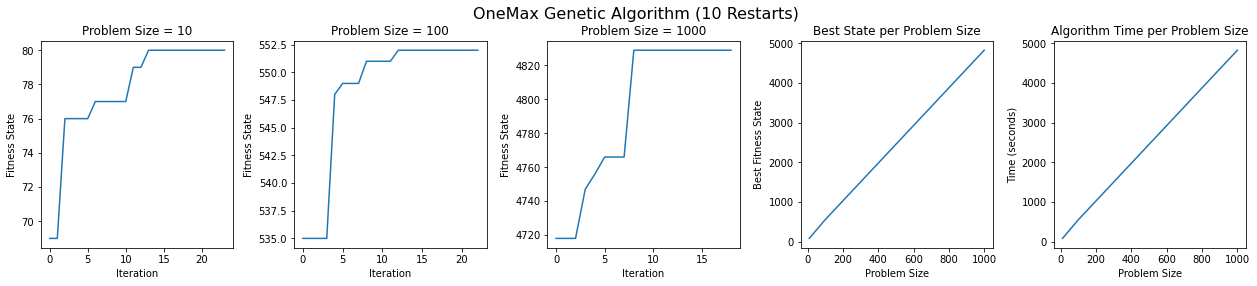

In [ ]:
fitness = mlrose.OneMax()
optimize(fitness, 'OneMax')

In [ ]:
fitness = mlrose.FourPeaks()
optimize(fitness, 'FourPeaks')

In [ ]:
fitness = mlrose.Queens()
optimize(fitness, 'Queens', queens=True)